# Simple Bandit
This is a notebook experimenting on the k-Armed Bandit test bed example in the "Reinforcement Learning" text by Barto and Sutton.
This is an example with summaries of experiments with a simple reinforcement learning algorithm

In [1]:
import sys
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
sys.path.insert(1, os.path.join(os.getcwd(),'src'))
import bandit

## k-Armed Bandit
This is a k-Armed Bandit problem with the reward for each of the k-arms given as follows:
1. Average Reward for each arm is normally distributed with mean 0 and std 1
2. Each reward is stochastic but stationary and normally distributed with the average reward (from above) as the mean and standard deviation 1.
The term stationary means that the distribution of reward does not change or drift with time/#steps taken during simulation

In [2]:
k = 10
R = []
np.random.seed(1)
for i in range(k):
    R += [bandit.Gaussian(0,1)[0]]
print("R = ", np.round(R,3))
# R =  [ 1.791  1.297 -0.863  2.485 -1.639  1.151  1.151  2.707 -0.943  1.665]

R =  [ 1.624 -0.612 -0.528 -1.073  0.865 -2.302  1.745 -0.761  0.319 -0.249]


## Rewards and Actions
In the example below with 10-arms, the average reward for action (or arm) #7 is the best any learning algorithm will achieve if it repeatedly chooses action #7. The distribution of rewards for each action is plotted below.

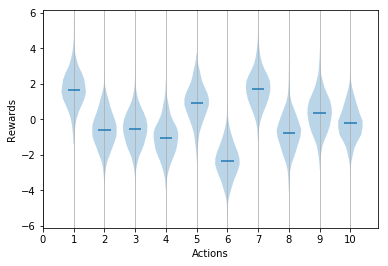

In [3]:
np.random.seed(1)
data = [np.random.normal(R[i],1,1000) for i in range(k)]
plt.violinplot(data,range(1,k+1),points=20,widths=0.8,showmeans=True,showextrema=False,showmedians=False);
plt.grid(axis='x');
plt.xticks(range(k+1));
plt.ylabel('Rewards');
plt.xlabel('Actions');

## Simulation after 50 steps
A simple simulation of the k-Armed bandit problem wiht a greedy algorithm of selecting the best action at each time step simulated over 50 steps is shown below.
1. The simulation starts with an initial reward of 0 for all actions.
2. At each step, the action with the maximum (average) reward is selected.
3. Since the reward for each action is stochastic, the reward is sampled from the distribution for the selected action and the average reward for that action is updated.
The plots below show that the greedy approach does not select the optimal action (action-7 in this case). This is because the greedy approach does not allow for any exploration of the value space over all actions, but simply selects the action that has the best current average reward.
4. Note that some of the actions have not been explored and therefore the average reward stays at zero. The third plot below shows the average reward of the actions selected during the simulation

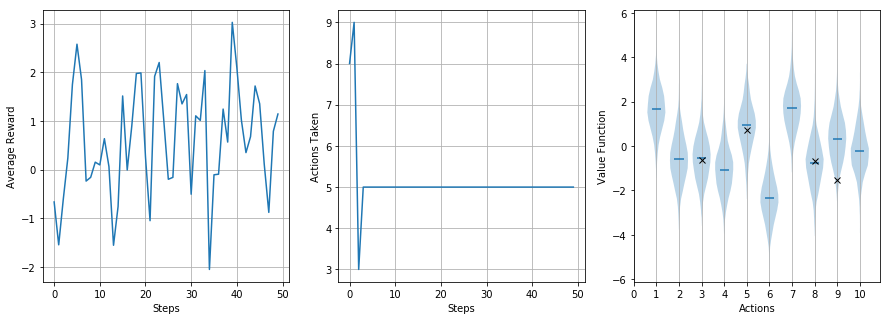

In [4]:
steps = 50
np.random.seed(3)
rewards_1Run,optAct_1Run,Q_1Run = bandit.simpleBandit(R,steps,0,0,0,0)
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(range(steps),rewards_1Run);
ax[0].grid(True);
ax[0].set_ylabel('Average Reward');
ax[0].set_xlabel('Steps');
ax[1].plot(range(steps),optAct_1Run);
ax[1].grid(True);
ax[1].set_ylabel('Actions Taken');
ax[1].set_xlabel('Steps');
val_1Run = [(i+1,v) for i,v in enumerate(Q_1Run) if v!= 0]
ax[2].violinplot(data,range(1,k+1),points=20,widths=0.8,showmeans=True,showextrema=False,showmedians=False);
[ax[2].plot(v[0],v[1],'kx') for v in val_1Run];
ax[2].grid(axis='x');
ax[2].set_xticks(range(k+1));
ax[2].set_ylabel('Value Function');
ax[2].set_xlabel('Actions');

## Simulation after 2000 runs each with 1000 steps
1. The simulation above is for just 1 run which is not representative of any stochastic process. We therefore run 2000 runs of the same simulation each with 1000 steps and take the average reward of all runs at each step.
2. The left plot shows how the average reward increases with each step. Note how the average reward is less than the theoretical maximum reward that an informed agent would make by selecting action #7 at each step
3. The middle plot below shows the percentage of times in each step among all runs that the optimal action (#7) was selected. Because of the greedy nature of this algorithm, optimal action has been selected in ~33% of all runs.
4. The third plot shows the standing average reward for all actions that have been updated by the simulation. The standing averages are not too close to the actual averages.

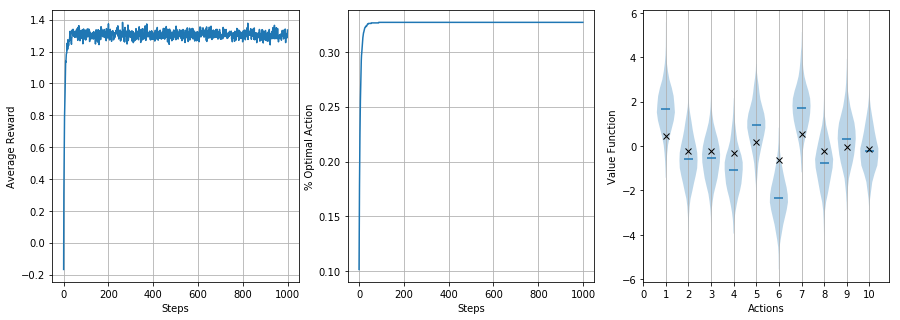

In [5]:
steps = 1000
runs = 2000
np.random.seed(2)
rewards_2kRun,optAct_2kRun,Q_2kRun = bandit.runSimpleBandit(R,steps,runs,[0],0,0,0)
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(range(steps),rewards_2kRun[0]);
ax[0].grid(True);
ax[0].set_ylabel('Average Reward');
ax[0].set_xlabel('Steps');
ax[1].plot(range(steps),optAct_2kRun[0]);
ax[1].grid(True);
ax[1].set_ylabel('% Optimal Action');
ax[1].set_xlabel('Steps');
val_2kRun = [(i+1,v) for i,v in enumerate(Q_2kRun[0]) if v!= 0]
ax[2].violinplot(data,range(1,k+1),points=20,widths=0.8,showmeans=True,showextrema=False,showmedians=False);
[ax[2].plot(v[0],v[1],'kx') for v in val_2kRun];
ax[2].grid(axis='x');
ax[2].set_xticks(range(k+1));
ax[2].set_ylabel('Value Function');
ax[2].set_xlabel('Actions');

## Exploration vs Exploitation
1. The above result with ~33% probability of chooseing optimal actions is unsatisfactory. This is a limitation of the greedy approach.
2. In this experiment, we compare the effect a small degree of exploration can have on the outcome. We run the above experiment with 2 different values of $\epsilon$. $\epsilon$ is a hyper-parameter used to select the degree of exploration by the agent. An $\epsilon$ value of 0.1 means that 10% of the time, the agent is acting in a non-greedy manner by choosing to select an action that does not have the max current reward. This leads to selecting actions that are not currently optimal, but have the potential to have long-term higher average reward.
3. We compare $\epsilon = [0.01,0.1]$ with the results from the above experiment.
4. In this comparison, we clearly see that a small amount of exploration can help in increasing the percentage of optimal actions. The higher the $\epsilon$, the faster the convergence, but there is a limit that balances exploration and exploitation. Beyong this limit, the process becomes random and the benfits of greedy approach slowly erodes.
5. The simulation with the lower $\epsilon$ also leads to a higher total average reward after 2000 runs.
6. The standing average of the value function for each exploratory sum is also close to the actual average

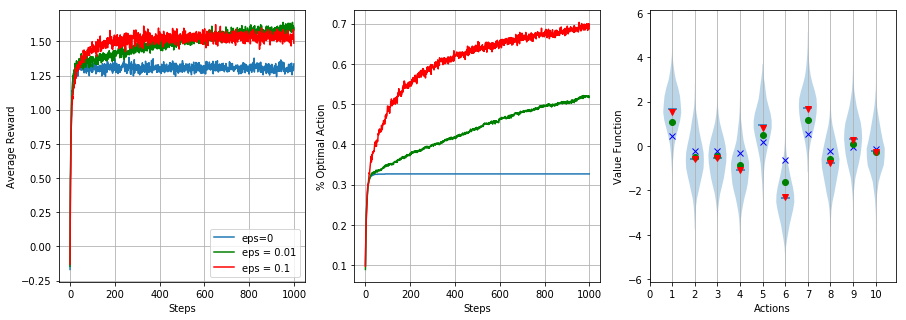

In [6]:
eps = [0.01,0.1]
np.random.seed(4)
rewards_eps,optAct_eps, Q_eps = bandit.runSimpleBandit(R,steps,runs,eps,0,0,0)
# rewards_eps,optAct_eps, Q_eps = bandit.runSimpleBandit(R,steps,1,eps,0,0,0)
val_eps = []
color   = ['b','g','r']
marker  = ['x','o','v']

fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(range(steps),rewards_2kRun[0]);
ax[1].plot(range(steps),optAct_2kRun[0]);
ax[2].violinplot(data,range(1,k+1),points=20,widths=0.8,showmeans=True,showextrema=False,showmedians=False);
[ax[2].plot(v[0],v[1],color[0]+marker[0]) for v in val_2kRun];

for i,e in enumerate(eps): 
    ax[0].plot(range(steps),rewards_eps[i],color[i+1]);
    ax[1].plot(range(steps),optAct_eps[i],color[i+1]);
    val_eps += [[(i+1,v) for i,v in enumerate(Q_eps[i]) if v!= 0]]
    [ax[2].plot(v[0],v[1],color[i+1]+marker[i+1]) for v in val_eps[-1]];
    
ax[0].legend(["eps=0"]+["eps = " + str(e) for e in eps])
ax[0].grid(True);
ax[0].set_ylabel('Average Reward');
ax[0].set_xlabel('Steps');
ax[1].grid(True);
ax[1].set_ylabel('% Optimal Action');
ax[1].set_xlabel('Steps');
ax[2].grid(axis='x');
ax[2].set_xticks(range(k+1));
ax[2].set_ylabel('Value Function');
ax[2].set_xlabel('Actions');

## Constant step size
1. All the above simulations use the sampled average approach where samples from every step are weighted equally. This is a strong assumption that is valid only for stationary tasks where the reward function remains the same throughout the completion of the task.
2. Another approach to averaging is using the exponential recency weighting where recent samples are weighted higher than older samples. This approach uses a constant "step-size" parameter $\alpha = [0,1)$.

#### Sampled average vs constant step size
The sample average approach can be expressed thus:
$$Q_{n+1} = \frac{Q_n \times n + R_{n+1}}{n+1}$$
where $Q_{n-1}$ is the average reward after n steps and $R_{n+1}$ is the reward at the $(n+1)^{th}$ step. This equation simplifies to:
$$Q_{n+1} = Q_n + \frac{1}{n+1} \left(R_{n+1}-Q_n\right)$$
The step size is defined by the coefficient to the second term on the right hand side of the above equation. We notice that the step-size varies with n.
For the constant-step size approach, the update rule is simplified to:
$$Q_{n+1} = Q_n + \alpha \left(R_{n+1}-Q_n\right)$$ where $\alpha$ is a constant

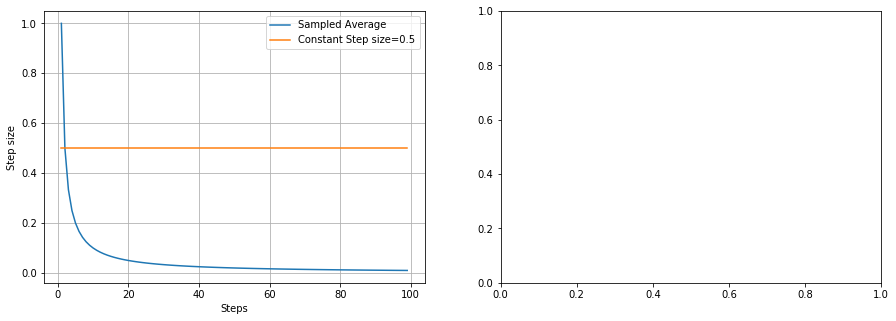

In [7]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(range(1,100),[1/float(a) for a in range(1,100)]);
ax[0].plot(range(1,100),[0.5 for a in range(1,100)]);
ax[0].legend(['Sampled Average','Constant Step size=0.5']);
ax[0].grid(True);
ax[0].set_xlabel('Steps');
ax[0].set_ylabel('Step size');
# ax[1].plot()

3. The following simulation compares the sample average approach with an eps = 0.1 with that of the constant step-size approach with alpha = 0.1 and 0.5.
4. The constant step-size approach does not seem to offer any advantages for this example with a stationary process as seen from the plots below. The rate of convergence is very slow in comparison to the sampled average approach with a good epsilon value.

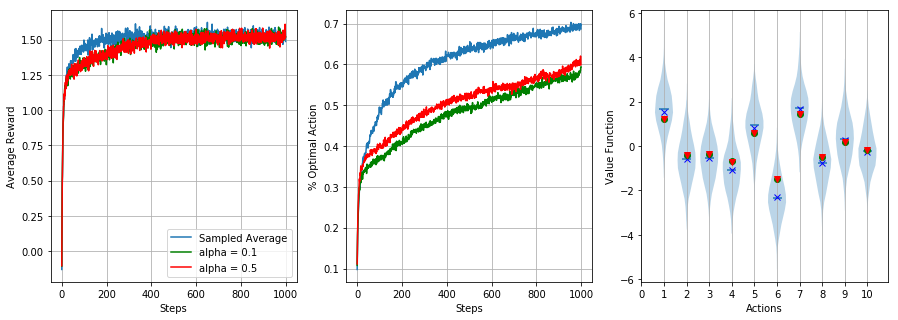

In [8]:
alpha = [0.1,0.5]
np.random.seed(5)

fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(range(steps),rewards_eps[1]);
ax[1].plot(range(steps),optAct_eps[1]);
ax[2].violinplot(data,range(1,k+1),points=20,widths=0.8,showmeans=True,showextrema=False,showmedians=False);
[ax[2].plot(v[0],v[1],color[0]+marker[0]) for v in val_eps[1]];

r_alpha = []
o_alpha = []
val_alpha = []

for i in range(len(alpha)):
    r,o,Q = bandit.runSimpleBandit(R,steps,runs,[eps[1]],0,alpha[0],0)
    r_alpha += [r[0]]
    o_alpha += [o[0]]
    val_alpha += [[(i+1,v) for i,v in enumerate(Q[0]) if v!= 0]]
    ax[0].plot(range(steps),r_alpha[i],color[i+1]);
    ax[1].plot(range(steps),o_alpha[i],color[i+1]);    
    [ax[2].plot(v[0],v[1],color[i+1]+marker[i+1]) for v in val_alpha[i]];

ax[0].legend(["Sampled Average","alpha = 0.1","alpha = 0.5"])
ax[0].grid(True);
ax[0].set_ylabel('Average Reward');
ax[0].set_xlabel('Steps');
ax[1].grid(True);
ax[1].set_ylabel('% Optimal Action');
ax[1].set_xlabel('Steps');
ax[2].grid(axis='x');
ax[2].set_xticks(range(k+1));
ax[2].set_ylabel('Value Function');
ax[2].set_xlabel('Actions');

## Non-stationary Task
1. We saw above that a constant step size approach does not really help with a stationary task. Now we do the same comparison with a non-stationary task.
2. In this experiment, we change the value function at each steps takes a random walk (drift) from the actual mean by a zero-mean normally distributed ($\sigma=0.01$) increment.
3. Because the drift changes the true average of the reward structure at every step, the sampled average greedy approach is less likely to give us a good reward outcome as seen below

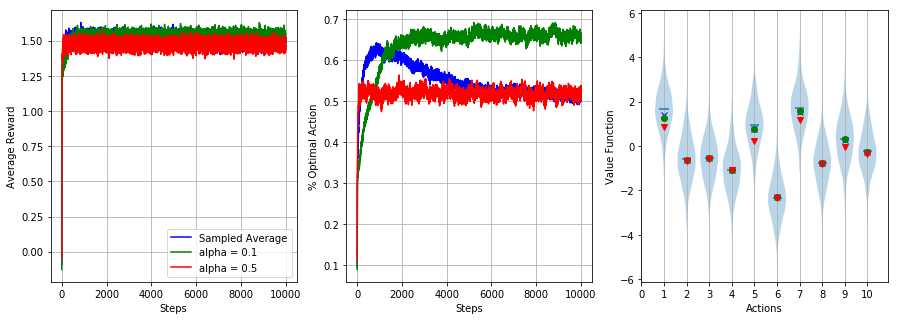

In [9]:
steps = 10000
runs = 2000
np.random.seed(6)

randomWalkSigma = 0.01
rewards_ns_sampled,optAct_ns_sampled,Q_ns_sampled = bandit.runSimpleBandit(R,steps,runs,[eps[1]],0,0,randomWalkSigma)

fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(range(steps),rewards_ns_sampled[0],color[0]);
ax[1].plot(range(steps),optAct_ns_sampled[0],color[0]);
val_ns_sampled = [[(i+1,v) for i,v in enumerate(Q_ns_sampled[0]) if v!= 0]]
ax[2].violinplot(data,range(1,k+1),points=20,widths=0.8,showmeans=True,showextrema=False,showmedians=False);
[ax[2].plot(v[0],v[1],color[0]+marker[0]) for v in val_ns_sampled[0]];

lgd = ['Sampled Average']

rewards_ns_alpha = []
optAct_ns_alpha  = []
val_ns_alpha       = []
for i in range(len(alpha)):
    r,o,Q = bandit.runSimpleBandit(R,steps,runs,[eps[1]],0,alpha[i],randomWalkSigma)
    rewards_ns_alpha += [r[0]]
    optAct_ns_alpha  += [o[0]]
    ax[0].plot(range(steps),rewards_ns_alpha[i],color[i+1]);
    ax[1].plot(range(steps),optAct_ns_alpha[i],color[i+1]);
    val_ns_alpha += [[(i+1,v) for i,v in enumerate(Q[0]) if v!= 0]]
    [ax[2].plot(v[0],v[1],color[i+1]+marker[i+1]) for v in val_ns_alpha[i]];    
    lgd += ['alpha = ' + str(alpha[i])]

ax[0].legend(lgd)
ax[0].grid(True);
ax[0].set_ylabel('Average Reward');
ax[0].set_xlabel('Steps');
ax[1].grid(True);
ax[1].set_ylabel('% Optimal Action');
ax[1].set_xlabel('Steps');
ax[2].grid(axis='x');
ax[2].set_xticks(range(k+1));
ax[2].set_ylabel('Value Function');
ax[2].set_xlabel('Actions');

## Initial Condition
Notice how in the very first experiment above, when the simulation is run for 1 run and 50 steps, not all actions were explored and the final average reward was sub-optimal. We can get around this by setting a very optimistic initial condition that is higher than the average reward from any of the actions. This will force the algorithm to explore all options even in the sampled average approach before convergence. While still useful, setting optimistic initial values still does not help with non-stationary tasks.
Notice how in the plot to the right below, the experiment with the initial rewards set to 5 (> average rewards of all tasks) has explored all the tasks as seen from the plotted non-zero averages of these rewards computed during the experiment.

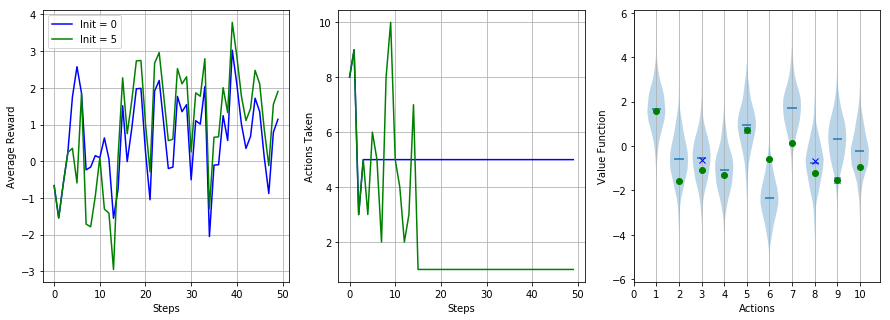

In [10]:
steps = 50
np.random.seed(3)
rewards_1Run_init,optAct_1Run_init,Q_1Run_init = bandit.simpleBandit(R,steps,0,5,0,0)
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(range(steps),rewards_1Run,color[0]);
ax[0].plot(range(steps),rewards_1Run_init,color[1]);
ax[1].plot(range(steps),optAct_1Run,color[0]);
ax[1].plot(range(steps),optAct_1Run_init,color[1]);
val_1Run_init = [(i+1,v) for i,v in enumerate(Q_1Run_init) if v!= 0]

ax[2].violinplot(data,range(1,k+1),points=20,widths=0.8,showmeans=True,showextrema=False,showmedians=False);
[ax[2].plot(v[0],v[1],color[0]+marker[0]) for v in val_1Run];
[ax[2].plot(v[0],v[1],color[1]+marker[1]) for v in val_1Run_init];

ax[0].legend(['Init = 0','Init = 5'])
ax[0].grid(True);
ax[0].set_ylabel('Average Reward');
ax[0].set_xlabel('Steps');
ax[1].grid(True);
ax[1].set_ylabel('Actions Taken');
ax[1].set_xlabel('Steps');
ax[2].grid(axis='x');
ax[2].set_xticks(range(k+1));
ax[2].set_ylabel('Value Function');
ax[2].set_xlabel('Actions');

## Exponential Recency Weighting without bias
$$\beta_n = \frac{\alpha}{\bar{o}_n}$$ where $$\bar{o}_n = \bar{o}_{n-1} + \alpha(1-\bar{o}_{n-1}) \text{   } \forall n \ge 0 \text{  and  } \bar{o}_0 = 0$$
This implies the following:
$$\bar{o}_n = \alpha \sum_{i=0}^{n-1} (1-\alpha)^i$$
$$\beta_n = \frac{1}{\sum_{i=0}^{n-1}(1-\alpha)^i}$$


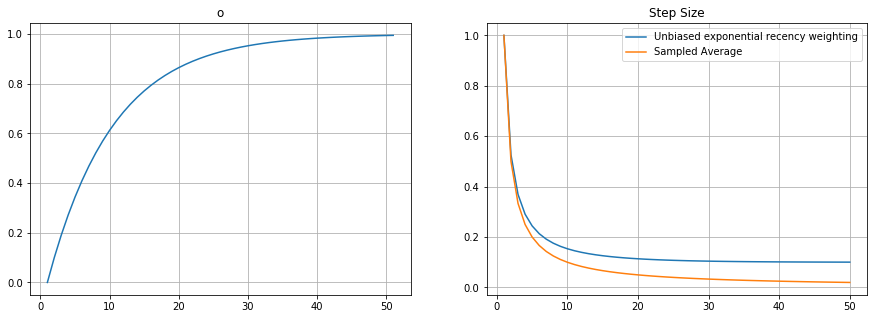

In [11]:
alpha = [0.1]
rewards_1Run_unbiased,optAct_1Run_unbiased,Q_1Run_unbiased, o_1Run_unbiased, beta_1Run_unbiased = bandit.unBiased_simpleBandit(R,50,0,0,alpha[0],0.01)

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(range(1,52),o_1Run_unbiased);
ax[1].plot(range(1,51),beta_1Run_unbiased);
ax[1].plot(range(1,51),[1/float(a) for a in range(1,51)]);
ax[0].set_title('o')
ax[1].set_title('Step Size')
ax[0].grid(True);
ax[1].grid(True);
ax[1].legend(['Unbiased exponential recency weighting','Sampled Average'])
# ax[0].set_xlabel('Steps');
# ax[0].set_ylabel('Step size');